In [1]:
# Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Loading data
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
dataset = pd.read_csv('doggy-boot-harness.csv')

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Print first few rows to inspect
dataset.head()

,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


In [4]:
# Filtering data by columns
# View harness sizes
dataset.harness_size

0     58
1     58
2     52
3     58
4     57
5     52
6     55
7     53
8     49
9     54
10    59
11    56
12    53
13    58
14    57
15    58
16    56
17    51
18    50
19    59
20    59
21    59
22    55
23    50
24    55
25    52
26    53
27    54
28    61
29    56
30    55
31    60
32    57
33    56
34    61
35    58
36    53
37    57
38    57
39    55
40    60
41    51
42    52
43    56
44    55
45    57
46    58
47    57
48    51
49    59
Name: harness_size, dtype: int64

In [5]:
# Removing irrelevant columns, Sex and Age
del dataset['sex']
del dataset['age_years']

In [7]:
# Review columns now available
print(f'The columns now available are: {dataset.columns.values}')

The columns now available are: ['boot_size' 'harness_size']


In [8]:
# Filtering data by rows - top of the table
print('Top of the table')
print(dataset.head())

Top of the table
   boot_size  harness_size
0         39            58
1         38            58
2         37            52
3         39            58
4         38            57


In [9]:
# Filtering data by rows - bottom of the table
print('Bottom of the table')
print(dataset.tail())

Bottom of the table
    boot_size  harness_size
45         41            57
46         39            58
47         39            57
48         35            51
49         39            59


In [11]:
# Filtering logically - small dogs with harness < 55
print(f'We have {len(dataset.harness_size<55)} rows of data')
dataset.harness_size<55

We have 50 rows of data


0     False
1     False
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: harness_size, dtype: bool

In [13]:
# Assign to a new column
dataset['is_small']=dataset['harness_size']<55
dataset.head()

,boot_size,harness_size,is_small
0,39,58,False
1,38,58,False
2,37,52,True
3,39,58,False
4,38,57,False


In [14]:
# Restrict data to dogs with boot sizes < 40
data_small_paws=dataset[dataset.boot_size<40]

In [20]:
# Show how many
print(f'We have {len(data_small_paws)} rows of data. The last few rows are:')
data_small_paws.tail()

We have 34 rows of data. The last few rows are:


,boot_size,harness_size,is_small
42,36,52,True
46,39,58,False
47,39,57,False
48,35,51,True
49,39,59,False


In [21]:
# Create new columns - harness size in inches
data_small_paws['harness_size_imperial']=data_small_paws['harness_size']/2.54

C:\Users\Tinashe.Kaseke\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# Inspect new dataframe
data_small_paws.head()

,boot_size,harness_size,is_small,harness_size_imperial
0,39,58,False,22.834646
1,38,58,False,22.834646
2,37,52,True,20.472441
3,39,58,False,22.834646
4,38,57,False,22.440945


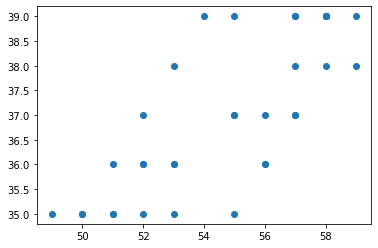

In [24]:
# Graphing the data for easier understanding
plt.scatter(x=data_small_paws['harness_size'],y=data_small_paws['boot_size'])
plt.show()

In [25]:
# Create a simple Linear Regression Model
import statsmodels.formula.api as smf

In [27]:
# Load dataset for training
data = pd.read_csv('doggy-boot-harness.csv')
data.head()


,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


In [28]:
# Create and train model
model=smf.ols(formula='boot_size~harness_size',data=data).fit()
print('Model trained')

Model trained


In [29]:
# Saving predictive model
import joblib
model_filename = './avalanche_dog_boot_model.pkl'
joblib.dump(model,model_filename)

['./avalanche_dog_boot_model.pkl']

In [30]:
# Loading model
model_loaded = joblib.load(model_filename)
print("We have loaded a model with following parameters:")
print(model.params)

We have loaded a model with following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


In [31]:
# Creating a function that loads model from disk and uses it to make a prediction
def load_model_and_predict(harness_size):
    # Load model and print basic info about it
    loaded_model = joblib.load(model_filename)
    print("We have loaded model with the following parameters:")
    print(loaded_model.params)
    
    # Prepare inputs for the model
    inputs = {'harness_size':[harness_size]}
    
    # Use model to make a prediction
    predicted_boot_size = loaded_model.predict(inputs)[0]
    return predicted_boot_size

In [33]:
# Practice using the model
predicted_boot_size=load_model_and_predict(45)
print('Predicted boot size:',predicted_boot_size)

We have loaded model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64
Predicted boot size: 32.08575356590478


In [34]:
# Real world use
# Creating a function that takes user input for harness_size and returns message
def check_size_of_boot (selected_harness_size , selected_boot_size):
    
    # Estimate customer's dog boot size
    estimated_boot_size = load_model_and_predict(selected_harness_size)
    estimated_boot_size=int(round(estimated_boot_size))
    
    # Check if boot size is appropriate
    if selected_boot_size == estimated_boot_size:
        return f'Great choice! We think these boots will fit your do well.'
    
    if selected_boot_size < estimated_boot_size:
        return f'The selected boots might be TOO SMALL for a dog as big as yours.\n We recommend boot size of {estimated_boot_size}.'
    
    if selected_boot_size > estimated_boot_size:
        return f'The selected boots might be TOO BIG for a dog as small as yours.\n We recommend boot size of {estimated_boot_size}.'

In [36]:
# Practice using new system
check_size_of_boot(selected_harness_size=55,selected_boot_size=39)

We have loaded model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


'The selected boots might be TOO BIG for a dog as small as yours.\n We recommend boot size of 38.'

In [37]:
# Practice using new system
check_size_of_boot(selected_harness_size=58,selected_boot_size=35)

We have loaded model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


'The selected boots might be TOO SMALL for a dog as big as yours.\n We recommend boot size of 40.'